In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [4]:

model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation='relu'),
         tf.keras.layers.MaxPooling2D((2, 2)),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(64, activation='relu'),
         tf.keras.layers.Dense(10, activation='softmax')                          
])

In [5]:

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [6]:
model_output = model.fit(X_train, Y_train, epochs = 15)

model.evaluate(X_test, Y_test)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1734 - accuracy: 0.9489
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0595 - accuracy: 0.9823
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0398 - accuracy: 0.9876
Epoch 4/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0213 - accuracy: 0.9935
Epoch 6/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0154 - accuracy: 0.9953
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0112 - accuracy: 0.9964
Epoch 8/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 9/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 10/15
1875/1875 [==============================] - 24s 13m

[0.06465866416692734, 0.9872000217437744]

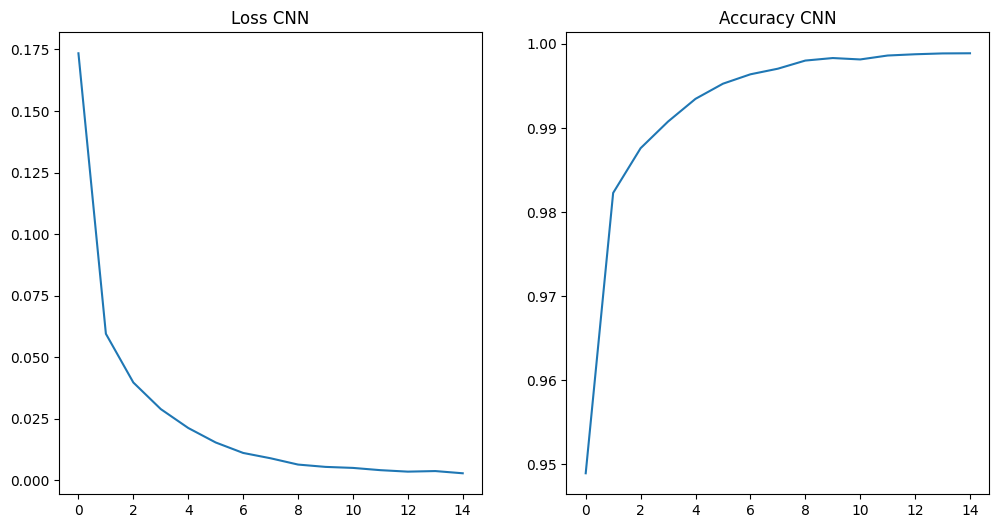

In [7]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()